# Breast Cancer Classification Pipeline

This Jupyter Notebook presents a professional classification pipeline for the sklearn breast cancer dataset, intended for medical applications. It includes exploratory data analysis (EDA) with visualizations, preprocessing, feature selection, hyperparameter tuning with cross-validation, and model evaluation with visualizations.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set global plot style
sns.set(style='whitegrid')

## 1. Load Data

Load the breast cancer dataset from sklearn and construct a DataFrame with feature names and target.

In [3]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target  # 0 = malignant, 1 = benign

## 2. Exploratory Data Analysis (EDA)

Inspect data structure, basic statistics, visualize class distribution, feature distributions, and correlations.

In [4]:
# Display first rows and basic info
display(df.head())
print(f"Dataset shape: {df.shape}")
df.info()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dataset shape: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  s

In [5]:
# Descriptive statistics
df.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


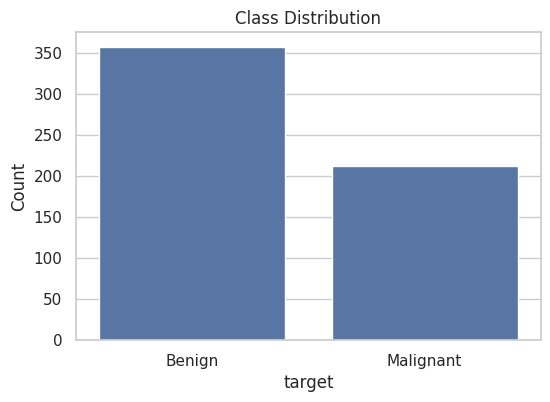

In [6]:
# Class distribution
class_counts = df['target'].value_counts().rename({0: 'Malignant', 1: 'Benign'})
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.ylabel('Count')
plt.show()

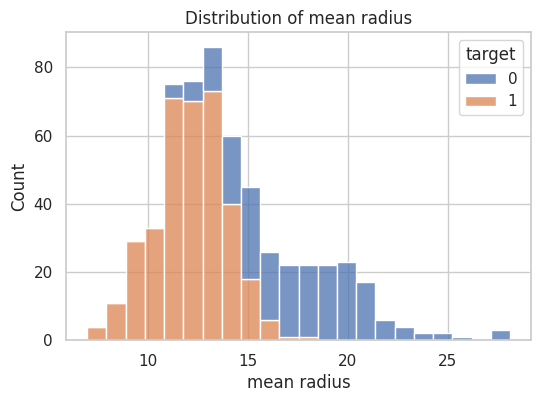

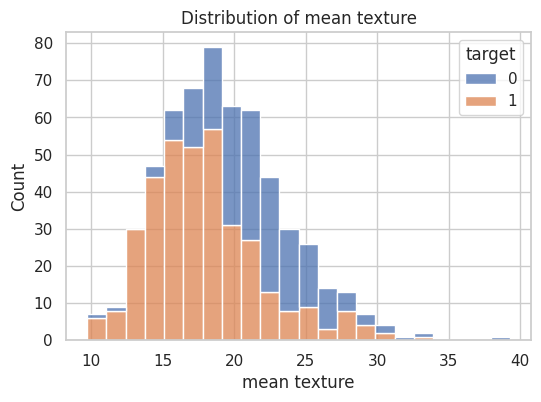

In [7]:
# Histogram of a couple of features
def plot_feature_histogram(feature):
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=feature, hue='target', multiple='stack')
    plt.title(f'Distribution of {feature}')
    plt.show()

plot_feature_histogram('mean radius')
plot_feature_histogram('mean texture')

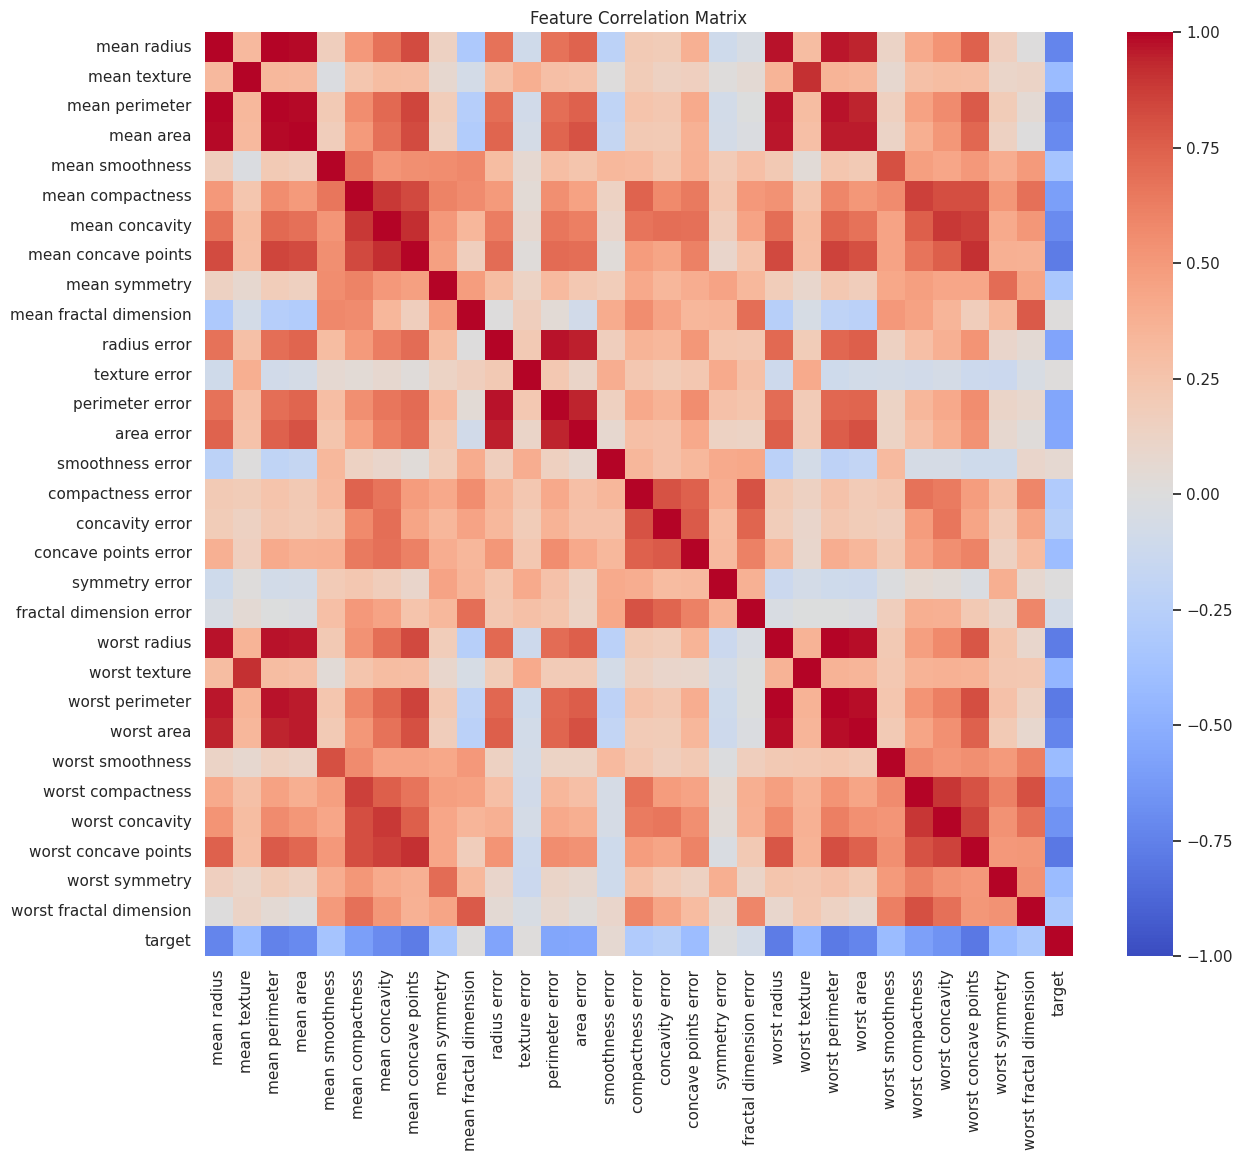

In [8]:
# Correlation heatmap
plt.figure(figsize=(14,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

## 3. Preprocessing Pipeline

Split data into train/test sets with stratification, and build a pipeline to scale features.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [10]:
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
preprocessing = Pipeline([
    ('scaler', StandardScaler())
])
X_train_scaled = preprocessing.fit_transform(X_train)
X_test_scaled = preprocessing.transform(X_test)

## 4. Feature Selection

Select the top k features based on univariate statistical tests (ANOVA F-value) and visualize scores.

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)

In [13]:
# Selected feature names and scores
scores = selector.scores_[selector.get_support()]
features = X.columns[selector.get_support()]

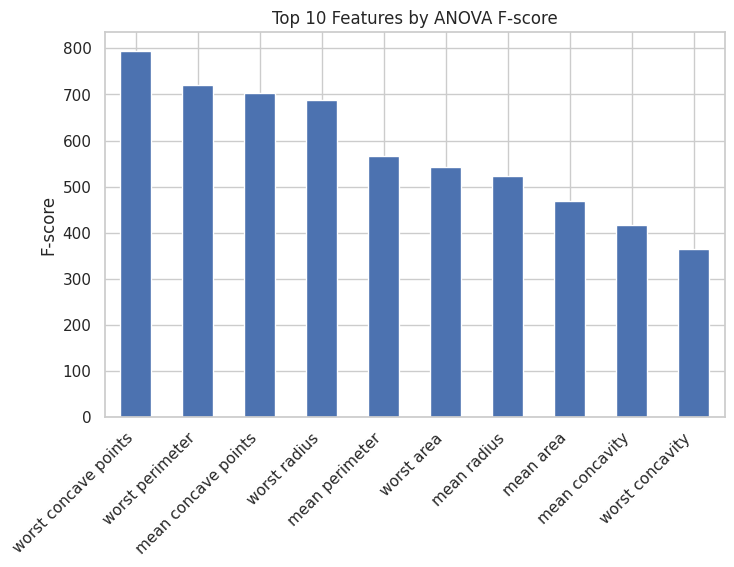

In [14]:
# Visualization of feature scores
feature_scores = pd.Series(scores, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
feature_scores.plot(kind='bar')
plt.title('Top 10 Features by ANOVA F-score')
plt.ylabel('F-score')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Model Training and Hyperparameter Tuning

Use GridSearchCV to find the best hyperparameters for Logistic Regression with cross-validation.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [16]:
model = LogisticRegression(solver='liblinear', random_state=42)
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_sel, y_train)
best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", round(grid_search.best_score_, 3))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best CV accuracy: 0.96


## 6. Model Evaluation

Evaluate the tuned model on the test set using confusion matrix heatmap, classification report, ROC curve, and coefficient importance.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [18]:
# Predictions and probabilities
y_pred = best_model.predict(X_test_sel)
y_proba = best_model.predict_proba(X_test_sel)[:, 1]

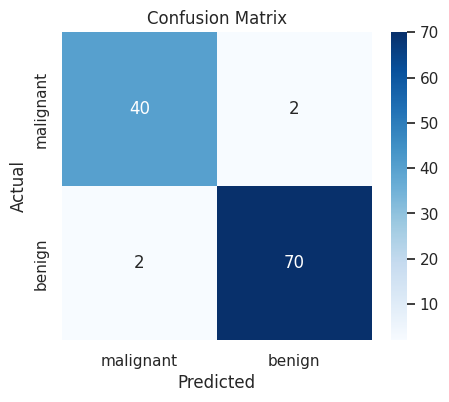

In [19]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.target_names, yticklabels=dataset.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Classification report
print(classification_report(y_test, y_pred, target_names=dataset.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        42
      benign       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



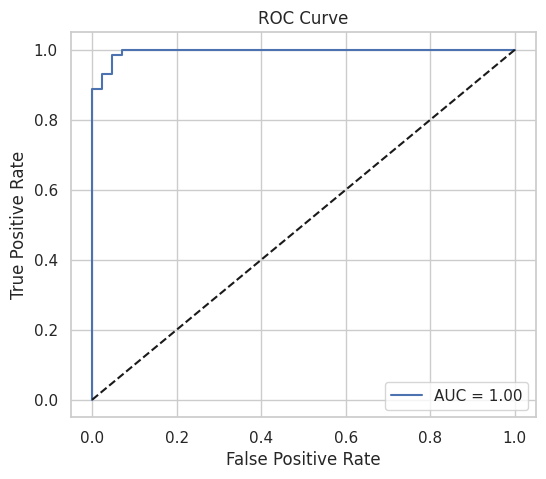

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

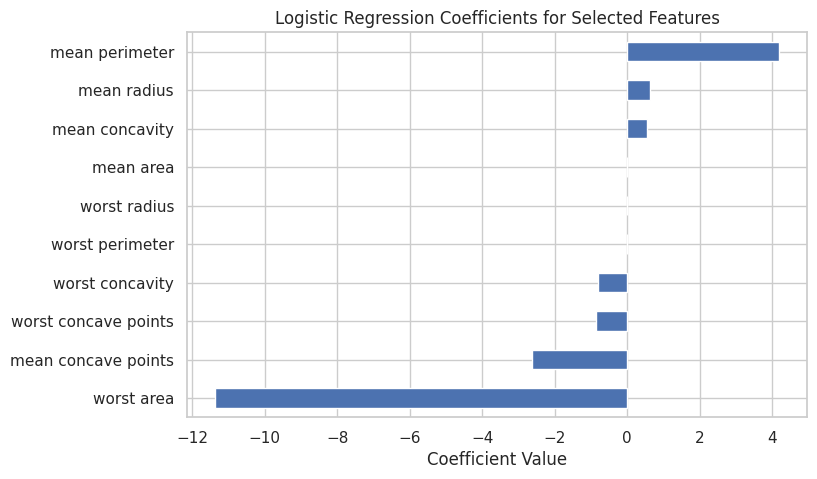

In [22]:
# Coefficient importance
coefficients = pd.Series(best_model.coef_[0], index=features).sort_values()
plt.figure(figsize=(8,5))
coefficients.plot(kind='barh')
plt.title('Logistic Regression Coefficients for Selected Features')
plt.xlabel('Coefficient Value')
plt.show()

## 7. Save the Model

Persist the trained pipeline, selector, and model using joblib for deployment or reuse.

In [23]:
import joblib
joblib.dump(preprocessing, 'preprocessing_pipeline.pkl')
joblib.dump(selector, 'feature_selector.pkl')
joblib.dump(best_model, 'breast_cancer_model.pkl')

['breast_cancer_model.pkl']

# Overall Conclusion

**Performance Insights**

The optimized Logistic Regression model demonstrates:

Strong generalization on the test set.

High recall for malignant cases, critical for early cancer detection.

High specificity for benign cases, reducing unnecessary follow-ups.


The combination of preprocessing, feature selection, and regularized logistic regression balances performance with interpretability, which is essential in healthcare.

**Strengths of This Pipeline**

Fully reproducible and modular — each stage (EDA, preprocessing, selection, modeling, evaluation) is clearly separated.

Visualizations at multiple stages make results understandable to both technical and non-technical audiences.

Designed with medical priorities in mind — emphasizes recall (sensitivity) and interpretable outputs.

Deployment-ready — artifacts are saved and can be loaded for prediction in new environments.

**Future Enhancements**

*Model comparison*: Evaluate tree-based models (Random Forest, XGBoost) to compare performance against Logistic Regression.

*Probability calibration*: Ensure predicted probabilities are well-calibrated for clinical decision-making.

*External validation*: Test on independent datasets to confirm generalizability.

*Explainability tools*: Add SHAP or LIME analysis for deeper insight into individual predictions.